In [2]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import datetime as dt
import matplotlib.pyplot as plt
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats
from termcolor import colored, cprint

In [3]:
df = pd.read_csv('project_data.csv')

In [4]:
df.head()

,user,adid,week,expid,if_click,real_like_cnt,category,brand_effect,experience,status,user_age,friend_age,user_gender,friend_gender,user_city,friend_city,user_degree,friend_degree,user_sns_like_cnt,user_sns_comment_cnt
0,297353,0b0fa14b56d3741178196daaa92e6a1e,w_2,1,0,3,Car,1,1,1,48,37,female,male,level_1,level_1,495,436,162,138
1,98719,ea875acb76e0a806a7837174528f62d9,w_3,1,0,3,Car,1,1,1,29,34,female,female,level_3,level_2,479,3911,212,312
2,205144,1f1fe825014d9e9a0881233d9950bd43,w_2,1,0,1,Jewelry,0,1,1,24,24,female,male,level_2,level_1,682,470,95,336
3,559194,1f1fe825014d9e9a0881233d9950bd43,w_2,1,0,5,Jewelry,0,1,1,26,41,male,male,level_1,level_1,340,602,35,138
4,11888,0d82161270febc99f7defb653e339113,w_3,0,0,1,Cosmetrics,0,1,1,40,34,female,female,level_1,level_2,95,836,50,38


In [14]:
print(len(df))

1000000


In [26]:
#Given a fixed size of sample
totalsamplesize=1000000

In [17]:
#df=pd.DataFrame
d_0 = df[df['expid'] == 0]['if_click']
d_1 = df[df['expid'] == 1]['if_click']

In [19]:
#population mean difference
delta = mean_difference=np.mean(d_1) - np.mean(d_0)
delta

0.007902000000000006

In [22]:
#np(1-p)
variance=np.mean(d_0)*(1-np.mean(d_0))
std=np.sqrt(variance)
print(delta,std)

0.007902000000000006 0.24933492973107477


In [15]:
from statsmodels.stats.power import zt_ind_solve_power

In [24]:
effectsize=delta/std
print(delta,effectsize)

0.007902000000000006 0.03169231045374536


In [27]:
power=[]
lpw=[]
for s in range(30,70):
    k1 =((s+1)/100)*totalsamplesize
    k0 = totalsamplesize-k1
    r = k1/k0
    pw=zt_ind_solve_power(effect_size=effectsize, nobs1=k0, alpha=0.05, ratio=r, alternative='two-sided')
    power.append((r,pw))
    lpw.append(pw)
    print(r,pw) 

0.4492753623188406 1.0
0.47058823529411764 1.0
0.4925373134328358 1.0
0.5151515151515151 1.0
0.5384615384615384 1.0
0.5625 1.0
0.5873015873015873 1.0
0.6129032258064516 1.0
0.639344262295082 1.0
0.6666666666666666 1.0
0.6949152542372882 1.0
0.7241379310344828 1.0
0.7543859649122807 1.0
0.7857142857142857 1.0
0.8181818181818182 1.0
0.8518518518518519 1.0
0.8867924528301887 1.0
0.9230769230769231 1.0
0.9607843137254902 1.0
1.0 1.0
1.0408163265306123 1.0
1.0833333333333333 1.0
1.127659574468085 1.0
1.173913043478261 1.0
1.2222222222222223 1.0
1.2727272727272727 1.0
1.3255813953488371 1.0
1.380952380952381 1.0
1.4390243902439024 1.0
1.5 1.0
1.564102564102564 1.0
1.631578947368421 1.0
1.7027027027027026 1.0
1.7777777777777777 1.0
1.8571428571428572 1.0
1.9411764705882353 1.0
2.0303030303030303 1.0
2.125 1.0
2.225806451612903 1.0
2.3333333333333335 1.0


In [28]:
#Find the max power
maxpw=np.max(lpw)
print(maxpw)

1.0


In [29]:
# Find ratio of power = maxpw
index_=[power.index(x) for x in power if x[1]==maxpw]
max_r=[power[i][0] for i in index_]
print(max_r)

[0.4492753623188406, 0.47058823529411764, 0.4925373134328358, 0.5151515151515151, 0.5384615384615384, 0.5625, 0.5873015873015873, 0.6129032258064516, 0.639344262295082, 0.6666666666666666, 0.6949152542372882, 0.7241379310344828, 0.7543859649122807, 0.7857142857142857, 0.8181818181818182, 0.8518518518518519, 0.8867924528301887, 0.9230769230769231, 0.9607843137254902, 1.0, 1.0408163265306123, 1.0833333333333333, 1.127659574468085, 1.173913043478261, 1.2222222222222223, 1.2727272727272727, 1.3255813953488371, 1.380952380952381, 1.4390243902439024, 1.5, 1.564102564102564, 1.631578947368421, 1.7027027027027026, 1.7777777777777777, 1.8571428571428572, 1.9411764705882353, 2.0303030303030303, 2.125, 2.225806451612903, 2.3333333333333335]


Text(0, 0.5, 'Power')

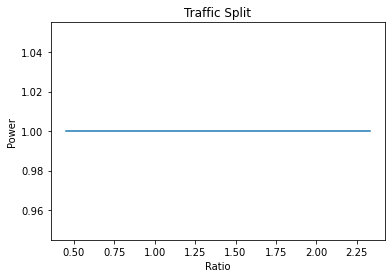

In [30]:
l_y=[x[1] for x in power]
s_x=[x[0] for x in power]

plt.plot(s_x,l_y)
plt.title('Traffic Split')
plt.xlabel('Ratio')
plt.ylabel('Power')

# Post Stratification

In [5]:
# Gender
gender_counts = df['user_gender'].value_counts()
gender_proportions = gender_counts / gender_counts.sum()

print("Gender counts:\n", gender_counts)
print("\nGender proportions:\n", gender_proportions)

Gender counts:
 male      500980
female    499020
Name: user_gender, dtype: int64

Gender proportions:
 male      0.50098
female    0.49902
Name: user_gender, dtype: float64


In [6]:
# Sample mean for each strata
mean_gender = df.groupby('user_gender')['if_click'].mean()
print(mean_gender)

user_gender
female    0.070446
male      0.070663
Name: if_click, dtype: float64


In [7]:
# Sample variance for each strata
var_gender = df.groupby('user_gender')['if_click'].var()
print(var_gender)

user_gender
female    0.065484
male      0.065670
Name: if_click, dtype: float64


In [13]:
# Post stratification mean
Post_stra = (mean_gender * gender_proportions).sum()
print(Post_stra)

0.070555


In [9]:
def post_strat_var(n, variance, proportions):
    v = (1/n) * (variance * proportions).sum() + \
    (1/(n**2)) * ((variance * (1- proportions)).sum())  #omitted the 3rd part because the sample size is large enough
    return v

In [10]:
n = 1000000
variance = var_gender
proportions = gender_proportions

In [11]:
post_strat_var(n, variance, proportions)

6.557717688721384e-08

In [18]:
# Compare with sample var
std = 0.0005120991371761987
sample_var = std **2
print(sample_var)

2.6224552629660715e-07
